<img src="https://justaklikaway.files.wordpress.com/2014/05/shut-up-and-take-my-money.jpg" height="400" width="400"> 

# <center> ML для маркетинга. <br>  <br> Сюжетная арка 1: продажи </center>

В этом семестре мы с вами пройдём через несколько сюжетных арок. Первой такой аркой будут продажи. Им будет посвящена первая серия из домашек и семинаров. 


### Задача:

Мы будем работать с датасетом __bikes_rent.csv__, в котором по дням записаны календарная информация и погодные условия, характеризующие автоматизированные пункты проката велосипедов, а также число прокатов в этот день. Последнее мы будем предсказывать; таким образом, мы будем решать задачу регрессии.


#  Эпизод III (месть менеджера) 

Модель готова, пора заколачивать бабло. Расчехляйте свой искусственный интеллект и готовьте мешок для шекелей. 

In [15]:
# Как обычно, для начала подгружаем нужные нам пакеты
import pandas as pd    # пакет для работы с таблицами 
import numpy as np     # пакет для работы с матрицами 

# пакеты для картиночек 
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # правильный (наиболее красивый) стиль у графиков

%matplotlib inline

__[1]__ Подгрузите тестовую выборку и модель. Выбросите из выборки все `pca`, если они в ней есть. 

In [16]:
df = pd.read_csv('data_test.csv', sep='\t')    # подгружаем датасет
df.drop(['pca_1', 'pca_2', 'pca_3'], axis=1, inplace=True)
print('Размерность таблицы:', df.shape)      # shape показывает его размер
df.head()      

Размерность таблицы: (120, 37)


,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt,season_2,season_3,season_4,yr_1,...,weekday_6,workingday_1,weathersit_2,weathersit_3,temp_sq,atemp_sq,hum_sq,windspeed(mph)_sq,windspeed(ms)_sq,super_nice_day
0,29.007500,33.08145,79.0833,10.125107,4.526199,6034,0,1,0,1,...,0,0,0,0,841.435056,1094.382334,6254.168339,102.517792,20.486477,False
1,29.759153,34.34440,75.5000,15.833507,7.078009,6864,0,1,0,1,...,0,1,0,0,885.607187,1179.537811,5700.250000,250.699944,50.098217,False
2,30.203347,35.44915,74.1250,12.583136,5.625005,7112,0,1,0,1,...,0,1,0,0,912.242170,1256.642236,5494.515625,158.335312,31.640680,False
3,28.563347,32.76645,81.0417,9.542207,4.265627,6203,0,1,0,1,...,0,1,1,0,815.864792,1073.640246,6567.757139,91.053714,18.195571,False
4,28.836653,32.86020,73.6250,11.500282,5.140940,7504,0,1,0,1,...,0,1,0,0,831.552556,1079.792744,5420.640625,132.256486,26.429260,False


In [17]:
from sklearn.externals import joblib

model_lasso = joblib.load('model_hw.pkl')
model_lasso

Lasso(alpha=2.9899999999999998, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

__[1]__ Постройте табличку с тремя столбцами: 

* Колонка с реальным спросом, `cnt` 
* Колонка со спросом, который предсказывает наша модель методом `predict`
* Колонка с наивным прогнозом (среднее по тренировочной выборке, напомню что оно оказалось равно $2054.$)

In [18]:
dfp = pd.DataFrame() 

dfp['real'] = df['cnt'] 
dfp['predict'] = model_lasso.predict(df.drop('cnt', axis=1).values)
dfp['naive'] = 2054
dfp.head()

,real,predict,naive
0,6034,4490.689944,2054
1,6864,4542.931663,2054
2,7112,4580.422962,2054
3,6203,4489.133039,2054
4,7504,4681.513762,2054


__[2]__   Какуюс среднюю ошибку допускают наши модели? Какая ошибается чаще?  Какой у моделей средний перепрогноз? Какой средний недопрогноз?

In [19]:
loss = dfp['naive'].values - dfp['real'].values
l_naive_over = np.mean(loss[loss > 0]) 
l_naive_under = -1*np.mean(loss[loss < 0])

l_naive_over, l_naive_under

(924.5555555555555, 3997.135135135135)

In [20]:
loss = dfp['predict'].values - dfp['real'].values
l_regr_over = np.mean(loss[loss > 0])
l_regr_under =-1*np.mean(loss[loss < 0])

l_regr_over, l_regr_under

(294.66075726660495, 3353.141911169361)

__[2]__  Какая из ошибок получилась больше (перепрогноз или недопрогноз)? Как думаете, из-за чего так происходит в случае нашей модели?  

Чтобы правильно ответить на этот вопрос, придётся сделать две вещи: 

1. Вспомнить какую метрику вы использовали для обучения модели и какими свойствами она обладает. Забыли как считаются метрики регрессии? [Освежите память в этом pdf.](https://github.com/FUlyankin/HSE_Data_Culture/blob/master/Intro_to_DS_2019/sem_6_regression/sem_6_semi.pdf) 
2. Построить гистограмму для спроса на тренировочной выборке (табличку с тренировочными данными придётся подгрузить в блокнот). Построить гистограмму для спроса на тестовой выборке. Сравните эти гистограммы между собой.

Соедините знания о данных и метриках и сделайте выводы. 

__Ответ:__ 

* Мы использовали для обучения MSE. Она пытается прогнозировать нам среднее и штрафует сильнее за более сильные ошибки из-зи квадрата. 
* По гистограммам с теста и трейна видно, что модель мы учили на одном подмножестве ответов, а тестируем её на другом. В тестовой выборке есть смещение в большую сторону, из-за этого возникает более большая ошибка перепрогноза. Когда пытаетесь разбивать выборку для решения задачи регрессии на тренировочную и тестовую, нужно следить чтобы распределение целевого признака было в обеих выборках похожим. 

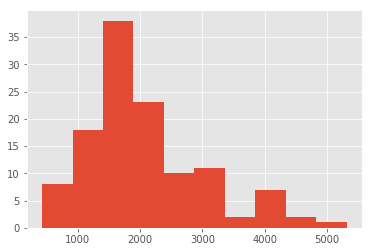

In [23]:
df = pd.read_csv('../sem1&2_data_prepare/data_train.csv', sep='\t')
df.cnt.hist();

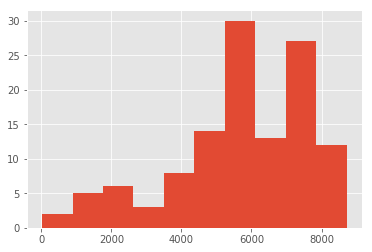

In [25]:
dfp.real.hist();

__[2]__  __Легенда:__ мэр одного крупного мегаполиса решил сделать свой город более хипстерским. Для этого он совместно с крупным банком открыл по всему городу пункты велопроката. Люди могут взять велик в одном месте, немного покататься и оставить его на любой другой удобной станции проката.

Велики довольно часто ломаются. Приходится обновлять велопарк. Если спрос слишком низкий, при этом в прокате слишком много великов, и происходит поломка, мэр просто выкидывает старый велик и ничего не делает. Если спрос высокий, мэр не только быстро чинит сломанные велики, но ещё и закупает новые. Мэр понимает, что в течение сезона спрос постоянно меняется. Для того, чтобы принимать правильные решения, он хочет использовать вашу модель. Объясни мэру по пунктам как можно это сделать и к какому бизнес-эффекту это приведёт. Опишите как измерить этот бизнес-эффект в деньгах. Если вы не понимаете о чём вообще идёт речь, [вспомните кекс про пиццу](https://github.com/FUlyankin/HSE_Data_Culture/blob/master/Intro_to_DS_2019/big_hw/big_hw2_ans.pdf) и пишите в чат. 

__Ответ:__  (Не надо только тут писать листы А4, двух небольшиз ёмких абзацев вполне достаточно. 

__[2]__ Мэра каждую ночь мучает кошмар. Ему снится как его оппонент побеждает в выборах, которые состоятся через год. Чтобы не допустить этого, мэр придумывает хитры план. Он будет вкидывать на рынок специально побольше великов, чтобы всем людям хватало и они оставались довольны.

Какой ошибки мэр боится сильнее недопрогноза или перепрогноза? Как можно переделать метрику для обучения регрессии, чтобы модель штрафовала одну из ошибок сильнее? Выпишите конкретные формулы.  Вбить формулы в тетрадку можно вот так: 

Когда вы допишите формулу и нажмёте для ячейки shift+enter, она превратиться вот в такое чудо: 


$$
x_t = x_{t-1} - \gamma \cdot L'(x)
$$

__Ответ:__  Нам нужна квантильная ошибка. Про неё подробнее можно почитать в прошлогодней пдф-ке. Больший вес надо будет дать недопрогнозу. Для него критичнее возникновение недовольства из-за нехватки велосипедов.